In [4]:
#Load the dataset

import pandas as pd 

dataset = pd.read_csv(r"C:\Users\Kasir\Downloads\tweets.csv", encoding = 'ISO-8859-1')

dataset.head(3)






,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False


In [7]:
def gen_freq(text):

    
    word_list = []

 

    
    for tw_words in text.split():

        word_list.extend(tw_words)

 

    

    word_freq = pd.Series(word_list).value_counts()

 


    word_freq[:10]

    return word_freq






In [5]:
!pip install wordCloud

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for wordCloud from https://files.pythonhosted.org/packages/00/09/abb305dce85911b8fba382926cfc57f2f257729e25937fdcc63f3a1a67f9/wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/299.9 kB 393.8 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/299.9 kB 798.9 kB/s eta 0:00:01
   ---------------- --------------------- 133.1/299.9 kB 787.7 kB/s eta 0:00:01
   ----------------------- -------------- 184.3/299.9 kB 743.9 kB/s eta 0:00:01
   ----------------------- -------------- 184.3/299.9 kB 743.9 kB/s eta 0:00:01
   ------------------------------- ------ 245.8/299.9 kB 718.0 kB/s eta 0:00:01
   -------------------------------------- 299.9/299.9 kB 806.9 kB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [11]:
!pip install wordCloud

Defaulting to user installation because normal site-packages is not writeable


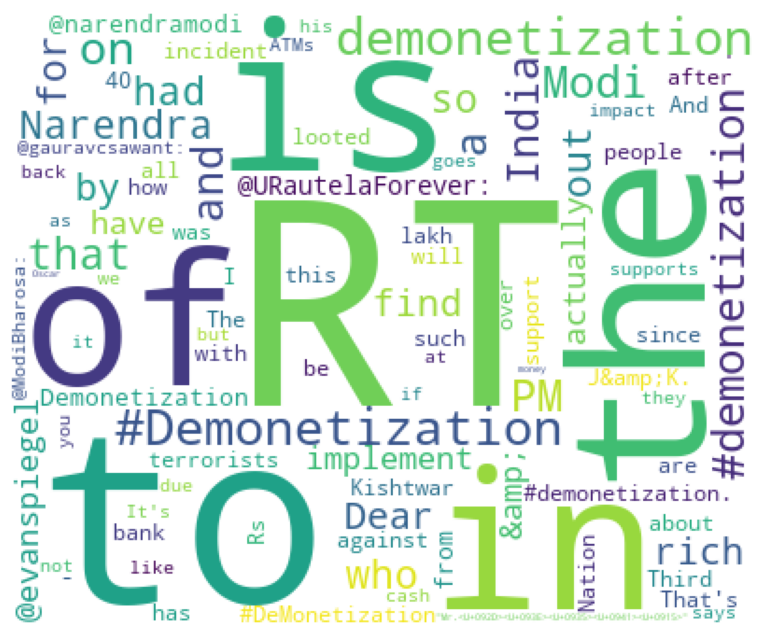

In [12]:


import matplotlib.pyplot as plt

from wordcloud import WordCloud


wc = WordCloud(width=400, height=330, max_words=200, 

        background_color='white').generate_from_frequencies(word_freq)

 

plt.figure(figsize=(12, 8))

plt.imshow(wc)

plt.axis('off')

plt.show()






In [13]:
import re

def clean_text(text):


    text = re.sub(r'RT', '', text)

   

    text = re.sub(r'&amp;', '', text)  

   

    text = re.sub(r'[?!.;:,#@-]', '', text)

    
    text = text.lower() 

  

    text = re.sub(r'\d+', '', text)

   
    text = re.sub(r'%', '', text)

    

    return text






In [14]:
from wordcloud import STOPWORDS
print(STOPWORDS)

{'with', "she'd", 'yours', "we'd", 'himself', 'all', 'too', 'an', 'any', "we've", 'them', 'else', "aren't", 'www', "what's", 'have', 'our', 'up', "he'd", 'cannot', 'does', "hadn't", 'the', "here's", 'am', "can't", "who's", 'out', 'shall', 'was', 'get', 'did', 'more', 'however', "weren't", "he's", 'a', 'but', 'not', 'theirs', "you've", 'your', 'above', 'off', 'yourself', "you're", 'very', "where's", 'hers', 'just', "we're", "that's", 'having', 'com', "he'll", 'been', "they're", 'under', 'of', 'if', 'by', "she's", 'also', 'there', 'same', 'to', 'what', 'this', 'therefore', 'against', 'doing', "hasn't", 'in', "they'd", 'once', 'before', 'yourselves', "wasn't", 'herself', "i'll", "i've", 'most', "didn't", 'my', "they'll", 'we', "why's", 'when', 'should', 'is', 'some', 'further', 'such', 'than', 'or', 'be', 'again', 'since', 'until', "let's", 'while', "there's", "don't", 'ought', "it's", 'itself', 'about', 'you', 'these', 'r', 'hence', 'their', "wouldn't", 'few', 'here', 'between', 'down', 

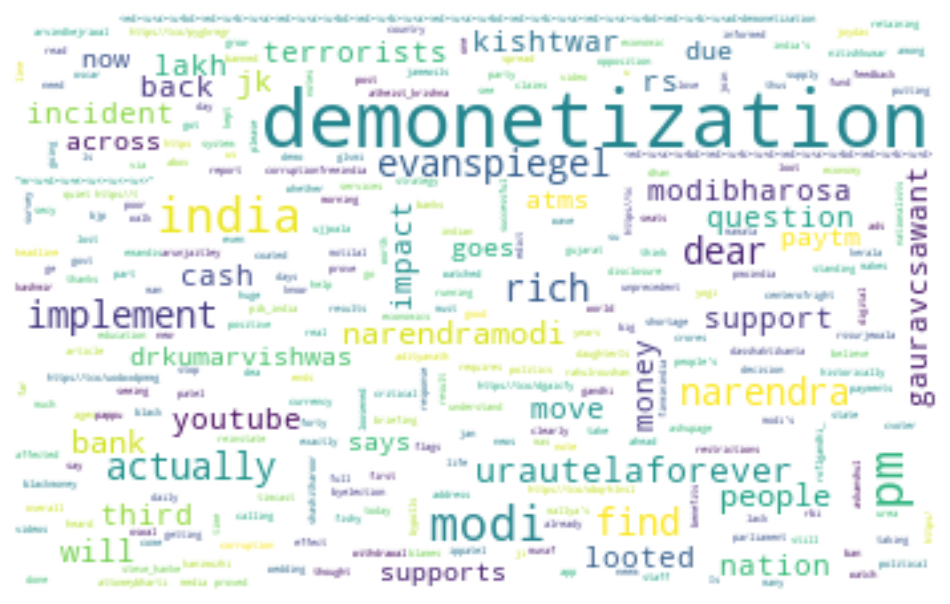

In [15]:
text = dataset.text.apply(lambda x: clean_text(x))

word_freq = gen_freq(text.str)

word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

 



wc = WordCloud(width=350, height=220, max_words=500, 

               background_color='white').generate_from_frequencies(word_freq)

 

plt.figure(figsize=(12, 8))

plt.imshow(wc, interpolation='bilinear')

plt.axis('off')

plt.show()






In [1]:
import pandas as pd 

 

text = ['Sarah lives in a hut in the village.', 

      'She has an apple tree in her backyard.', 

      'The apples are red in colour.']

 

df = pd.DataFrame(text, columns=['Sentence'])

 

df






,Sentence
0,Sarah lives in a hut in the village.
1,She has an apple tree in her backyard.
2,The apples are red in colour.
